In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### COUNTRY ANALYSIS

In [4]:
country = df['country'].value_counts().reset_index().head(10)
country = pd.DataFrame(country)
country

,index,country
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


<AxesSubplot:xlabel='index', ylabel='country'>

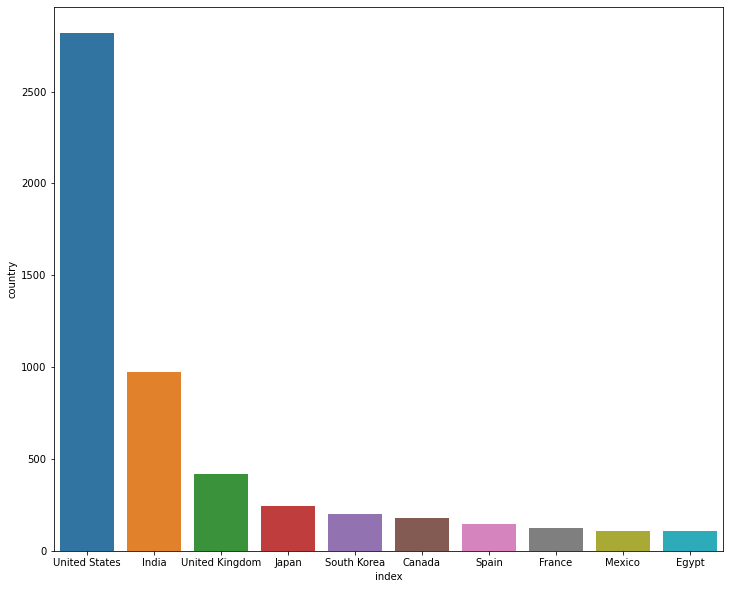

In [5]:
plt.figure(figsize=(12,10))
sns.barplot(x="index", y="country", data=country)

### RELEASE YEAR

In [6]:
release_year = df['release_year'].value_counts().reset_index().head(10)
release_year = pd.DataFrame(release_year)
release_year

,index,release_year
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


<AxesSubplot:xlabel='index', ylabel='release_year'>

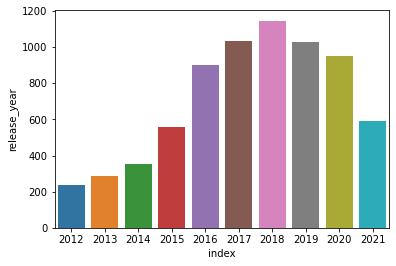

In [7]:
sns.barplot(x="index", y="release_year",  data=release_year)

In [8]:
move_tvshows = df.type.value_counts().reset_index()
move_tvshows = pd.DataFrame(move_tvshows)
move_tvshows

,index,type
0,Movie,6131
1,TV Show,2676


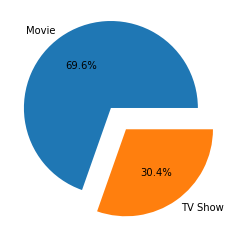

In [9]:
plt.pie(move_tvshows['type'],labels=['Movie','TV Show'],explode = [.1,.2], autopct='%1.1f%%');

### GENRE

In [10]:
movie_genre = df['listed_in']
movie_genre = pd.DataFrame(movie_genre)
movie_genre

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [11]:
# converted upper-lower case
movie_genre['listed_in'] = movie_genre['listed_in'].apply(lambda x: " ".join(x.lower() for x in x.split(','))) 

In [12]:
# removing punctuations
movie_genre['listed_in'] = movie_genre['listed_in'].str.replace("[^\w\s]","")

<ipython-input-12-5efbdf3ada7d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_genre['listed_in'] = movie_genre['listed_in'].str.replace("[^\w\s]","")


In [13]:
# removing unneccessary word
sentences = ['tv', 'international', 'tv', 'korean', 'shows', '&', 'movies', 'independent']

In [14]:
# removing unneccessary word
movie_genre['listed_in'] = movie_genre['listed_in'].apply(lambda x: " ".join(x for x in x.split() if x not in sentences))

In [15]:
# count words
movie_genre1 = pd.Series(" ".join(movie_genre['listed_in']).split()).value_counts()
movie_genre1 = pd.DataFrame(movie_genre1, columns = ['genres'])
movie_genre1

,genres
dramas,3190
comedies,2255
adventure,1027
action,1027
romantic,986
documentaries,869
children,641
family,641
thrillers,634
crime,470


In [16]:
movie_genre2 = movie_genre1.head().reset_index()
movie_genre2

,index,genres
0,dramas,3190
1,comedies,2255
2,adventure,1027
3,action,1027
4,romantic,986


<AxesSubplot:xlabel='index', ylabel='genres'>

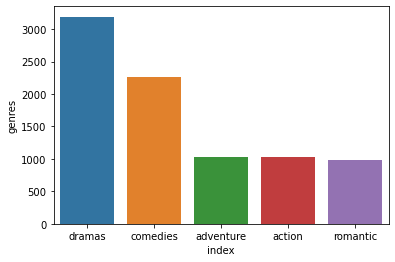

In [17]:
# viewing top 5 category
sns.barplot(x="index", y="genres",data=movie_genre2)

### ADDED DATE

In [18]:
date_added = df['date_added']
date_added = pd.DataFrame(date_added)
date_added

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [19]:
date_added = date_added['date_added'].str.split(',', expand=True) 
date_added = pd.DataFrame(date_added[1])
date_added = date_added.value_counts()
date_added = pd.DataFrame(date_added)
date_added = date_added.head().reset_index()
date_added

,1,0
0,2019,2016
1,2020,1879
2,2018,1649
3,2021,1498
4,2017,1188


In [20]:
date_added = date_added.set_axis(['year','total'], axis=1, inplace=False) # rename columns
date_added

,year,total
0,2019,2016
1,2020,1879
2,2018,1649
3,2021,1498
4,2017,1188


<AxesSubplot:xlabel='year', ylabel='total'>

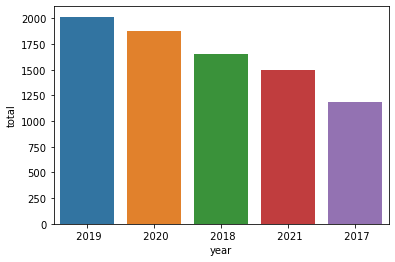

In [21]:
sns.barplot(x="year", y="total",data=date_added)

### CAST ANALYSIS

In [22]:
cast = df['cast']
cast = pd.DataFrame(cast, columns = ['cast'])
cast

,cast
0,NaN
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,NaN
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,NaN
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [23]:
cast.dropna(subset=['cast'], inplace=True)

In [24]:
# count names
cast = pd.Series(" ".join(cast['cast']).split(',')).value_counts()
cast = pd.DataFrame(cast, columns = ['cast'])
cast = cast.head().reset_index()
cast

,index,cast
0,Anupam Kher,37
1,Rupa Bhimani,31
2,Takahiro Sakurai,29
3,Julie Tejwani,28
4,Om Puri,27


<AxesSubplot:xlabel='cast', ylabel='index'>

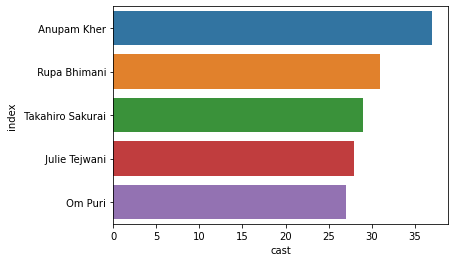

In [25]:
sns.barplot(x="cast", y="index",data=cast)

In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
